In [2]:
pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install --upgrade numpy scipy

Defaulting to user installation because normal site-packages is not writeable
  Using cached scipy-1.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: mlnx-tools -5.2.0- has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mlnx-tools or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible

TypeError: len() takes exactly one argument (0 given)

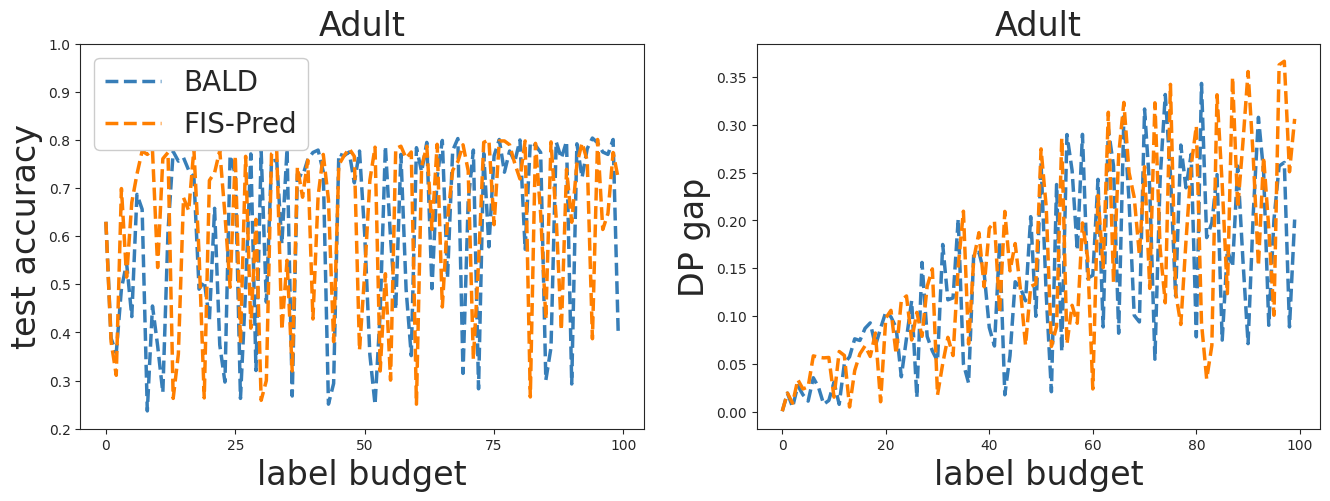

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set the Seaborn theme
sns.set_style('ticks')
palette = plt.get_cmap('Set1')


'''
Dataset option
'''

# 1: adult
# 2: compas
# 3: jigsaw
# 4: celeba

dataset_num = 1

if dataset_num == 1:
    ################ adult dataset ###########################

    dataset = 'adult'
    dataset_tag = 'Adult'

    tol = 0.05
    avg_cnt = 3
    suffix = ''
    root = f'./logs/fair_sampling/{dataset}/'
    file_name_strategy5 = 'label_s5_dp_4_default.log'
    file_name_baseline = 'label_s6_dp_4_budget.log'
    gap_lower_bound = 0
    gap_upper_bound = 0.15
    
    acc_lower_bound = 0.2
    acc_upper_bound = 1.00
    
    ###########################################################
elif dataset_num ==2:

    ################ compas dataset ###########################

    dataset = 'compas'
    dataset_tag = 'Compas'

    tol = 0.05
    avg_cnt = 3
    suffix = ''
    root = f'./logs/fair_sampling/{dataset}/'
    file_name_strategy5 = 'label_s5_dp_4_budget.log'
    file_name_baseline = 'label_s6_dp_4_budget.log'
    gap_lower_bound = 0.2
    gap_upper_bound = 0.4
    
    acc_lower_bound = 0.65
    acc_upper_bound = 0.8
    ###########################################################

elif dataset_num == 3:
    ################ jigsaw dataset ###########################

    dataset = 'jigsaw'
    dataset_tag = 'Jigsaw'

    tol = 0.05
    avg_cnt = 3
    suffix = ''
    root = f'./logs/fair_sampling/{dataset}/'
    file_name_strategy5 = 'label_s5_dp_4_1024.log'
    file_name_baseline = 'label_s6_dp_4_1024.log'
    gap_lower_bound = 0
    gap_upper_bound = 0.15

    acc_lower_bound = 0.5
    acc_upper_bound = 0.8
    ###########################################################
elif dataset_num == 4:

    ############### celeba dataset ###########################
    dataset = 'celeba'
    dataset_tag = 'CelebA'
    tol = 0.05
    #tol = 0.01
    avg_cnt = 3
    suffix = ''
    # root = f'./logs/fair_sampling/{dataset}-backup/'
    root = f'./logs/fair_sampling/{dataset}/'
    file_name_strategy5 = 'Smiling_s5_dp_4_256.log'
    file_name_baseline = 'Smiling_s6_dp_4_256.log'
    gap_lower_bound = 0
    gap_upper_bound = 0.1
    
    acc_lower_bound = 0.8
    acc_upper_bound = 0.9

baseline = 'BALD'
proposed_method = 'FIS-Pred' 


# Read your log file
with open(root + file_name_strategy5, 'r') as file:
    log_data_strategy5 = file.read()

# Additional log data (for comparison)
# Read your log file
with open(root + file_name_baseline, 'r') as file:
    log_data_baseline = file.read()


# Regular expression pattern to find test accuracy and DP gap
pattern = r'test acc: ([0-9.]+) .+ test dp gap: ([0-9.]+)'

# Extracting data
test_acc = []
dp_gap = []

for match in re.finditer(pattern, log_data_strategy5):
    test_acc.append(float(match.group(1)))
    dp_gap.append(float(match.group(2)))


# Note: This will work if the length of dp_gap is divisible by 4.
# If it's not, you might need to handle the last few values separately.


### Baseline: BALD

additional_test_acc = []
additional_dp_gap = []

for match in re.finditer(pattern, log_data_baseline):
    additional_test_acc.append(float(match.group(1)))
    additional_dp_gap.append(float(match.group(2)))

# # Plotting Test Accuracy
# fig, ax1 = plt.subplots()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

rounds_list = list(range(len(test_acc)))

ax1.plot(rounds_list, additional_test_acc, color=palette(1), label=baseline, linewidth=2.5, linestyle='--')
ax1.plot(rounds_list, test_acc, color=palette(4), label=proposed_method, linewidth=2.5, linestyle='--')

ax1.set_title(dataset_tag, fontsize=24)
ax1.set_xlabel('label budget', fontsize=24)
ax1.set_ylabel('test accuracy', fontsize=24)
ax1.set_xticks(np.arange(0, len(test_acc) + 1, 25))  # Set x-axis ticks
ax1.legend(loc='upper left', frameon=True, framealpha=1, fontsize = 20)
ax1.set_ylim(acc_lower_bound, acc_upper_bound)  # Set x-axis ticks


# # Plotting DP Gap
# fig, ax2 = plt.subplots()

# Assuming dp_gap is your original list of DP gap values
averaged_dp_gap = [sum(dp_gap[i:i+4]) / 4 for i in range(0, len(dp_gap), 4)]
baseline_averaged_dp_gap = [sum(averaged_dp_gap[i:i+4]) / 4 for i in range(0, len(dp_gap), 4)]


# ax2.plot(rounds_list, baseline_averaged_dp_gap, color=palette(1), label=baseline, linewidth=3, linestyle='--')
# ax2.plot(rounds_list, averaged_dp_gap, color=palette(4), label=proposed_method, linewidth=2.5, linestyle='--')


ax2.plot(rounds_list, additional_dp_gap, color=palette(1), label=baseline, linewidth=2.5, linestyle='--')
ax2.plot(rounds_list, dp_gap, color=palette(4), label=proposed_method, linewidth=2.5, linestyle='--')

ax2.set_title(dataset_tag, fontsize=24)
ax2.set_xlabel('label budget', fontsize=24)
ax2.set_ylabel('DP gap', fontsize=24)
ax2.set_xticks(np.arange(0, len() +1, 25))  # Set x-axis ticks
ax2.set_ylim(gap_lower_bound, gap_upper_bound)  # Set x-axis ticks


ax2.legend(loc='upper left', frameon=True, framealpha=1, fontsize = 20)

plt.subplots_adjust(hspace=5)  # Adjust this value to increase space between plots

plt.show()

fig_path = 'figures/'
big_fig_name = dataset + '_impact_label_budget.pdf'
fig.savefig(fig_path + big_fig_name, dpi=300, bbox_inches='tight')


# Plot the impact of label budgets

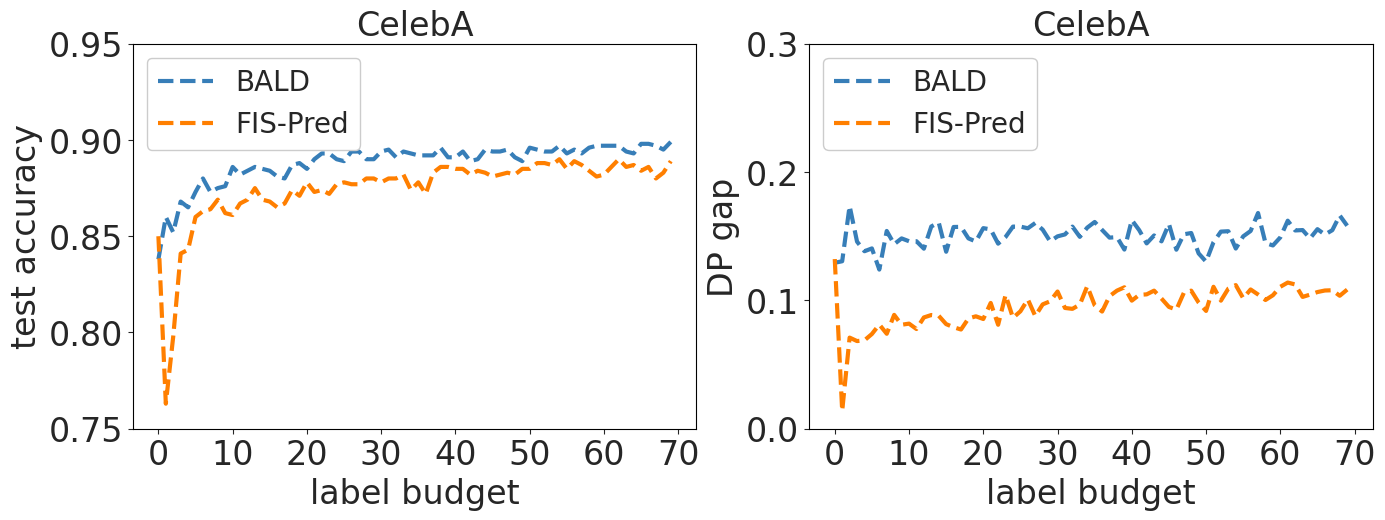

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set the Seaborn theme
sns.set_style('ticks')
palette = plt.get_cmap('Set1')


def moving_average(data, window_size):
    """计算移动平均"""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 5))


'''
Dataset option
'''

# 1: adult
# 2: compas
# 3: jigsaw
# 4: celeba

##############################

dataset_num = 4

##############################

if dataset_num == 1:
    ################ adult dataset ###########################

    dataset = 'adult'
    dataset_tag = 'Adult'

    tol = 0.05
    avg_cnt = 3
    suffix = ''
    root = f'./logs/fair_sampling/{dataset}/'
    file_name_strategy5 = 'label_s5_dp_4_budget.log'
    file_name_baseline = 'label_s8_dp_4_budget.log'
    gap_lower_bound = 0
    gap_upper_bound = 0.4
    
    acc_lower_bound = 0.2
    acc_upper_bound = 1.00

    step_gap = 25
    # 设置窗口大小
    window_size = 8
    
    ###########################################################
elif dataset_num ==2:

    ################ compas dataset ###########################

    dataset = 'compas'
    dataset_tag = 'Compas'

    tol = 0.05
    avg_cnt = 3
    suffix = ''
    root = f'./logs/fair_sampling/{dataset}/'
    file_name_strategy5 = 'label_s5_dp_4_budget.log'
    # file_name_strategy5 = 'label_s5_dp_4_budget.log'
    # file_name_baseline = 'label_s6_dp_4_budget.log'
    file_name_strategy5 = 'label_s2_dp_4_budget.log'
    file_name_baseline = 'label_s8_dp_4_budget.log'
    gap_lower_bound = 0.25
    gap_upper_bound = 0.4
    
    acc_lower_bound = 0.65
    acc_upper_bound = 0.75
    step_gap = 50
    window_size = 8
    ###########################################################

elif dataset_num == 3:
    ################ jigsaw dataset ###########################

    dataset = 'jigsaw'
    dataset_tag = 'Jigsaw'

    tol = 0.05
    avg_cnt = 3
    suffix = ''
    root = f'./logs/fair_sampling/{dataset}/'
    file_name_strategy5 = 'label_s5_dp_4_512.log'
    file_name_baseline = 'label_s6_dp_4_512.log'
    gap_lower_bound = 0
    gap_upper_bound = 0.15

    acc_lower_bound = 0.65
    acc_upper_bound = 0.8
    step_gap = 25
    window_size = 5
    ###########################################################
elif dataset_num == 4:

    ############### celeba dataset ###########################
    dataset = 'celeba'
    dataset_tag = 'CelebA'
    tol = 0.05
    #tol = 0.01
    avg_cnt = 3
    suffix = ''
    # root = f'./logs/fair_sampling/{dataset}-backup/'
    root = f'./logs/fair_sampling/{dataset}-01-27-runs0/'
    # file_name_strategy5 = 'Smiling_s5_dp_4_256.log'
    # file_name_baseline = 'Smiling_s6_dp_4_256.log'
    file_name_strategy5 = 'Smiling_s5_dp_4_256.log'
    file_name_baseline = 'Smiling_s8_dp_4_default.log'
    gap_lower_bound = 0
    gap_upper_bound = 0.3
    
    acc_lower_bound = 0.75
    acc_upper_bound = 0.95
    step_gap = 10
    window_size = 1



############################################
baseline = 'BALD'
proposed_method = 'FIS-Pred' 


##########################################################
# Read your log file
with open(root + file_name_strategy5, 'r') as file:
    log_data_strategy5 = file.read()

# Additional log data (for comparison)
# Read your log file
with open(root + file_name_baseline, 'r') as file:
    log_data_baseline = file.read()


# Regular expression pattern to find test accuracy and DP gap
pattern = r'test acc: ([0-9.]+) .+ test dp gap: ([0-9.]+)'

# Extracting data
test_acc = []
dp_gap = []

for match in re.finditer(pattern, log_data_strategy5):
    test_acc.append(float(match.group(1)))
    dp_gap.append(float(match.group(2)))


# Note: This will work if the length of dp_gap is divisible by 4.
# If it's not, you might need to handle the last few values separately.


### Baseline: BALD
additional_test_acc = []
additional_dp_gap = []

for match in re.finditer(pattern, log_data_baseline):
    additional_test_acc.append(float(match.group(1)))
    additional_dp_gap.append(float(match.group(2)))

# # Plotting Test Accuracy
# fig, axs[0] = plt.subplots()



rounds_list = list(range(len(test_acc)))

############################################################################################
'''test accuracy'''

# 对 dp_gap 和 additional_dp_gap 应用移动平均
smoothed_test_acc = moving_average(test_acc, window_size)
smoothed_additional_test_acc = moving_average(additional_test_acc, window_size)

# 更新 rounds_list 以匹配平滑数据的长度
smoothed_rounds_list = list(range(len(smoothed_test_acc)))

axs[0].plot(smoothed_rounds_list, smoothed_additional_test_acc, color=palette(1), label=baseline, linewidth=3, linestyle='--')
axs[0].plot(smoothed_rounds_list, smoothed_test_acc, color=palette(4), label=proposed_method, linewidth=3, linestyle='--')

axs[0].set_title(dataset_tag, fontsize=24)
axs[0].set_xlabel('label budget', fontsize=24)
axs[0].set_ylabel('test accuracy', fontsize=24)
axs[0].set_xticks(np.arange(0, len(smoothed_test_acc) +10,step_gap ))  # Set x-axis ticks
axs[0].legend(loc='upper left', frameon=True, framealpha=1, fontsize = 20)
axs[0].set_ylim(acc_lower_bound, acc_upper_bound)  # Set x-axis ticks

# For Test Accuracy subplot
axs[0].tick_params(axis='both', labelsize=24)
axs[0].spines['bottom'].set_color('black')
axs[0].spines['left'].set_color('black')
axs[0].spines['top'].set_color('black')
axs[0].spines['right'].set_color('black')

############################################################################################
'''fairness disparity'''

# 对 dp_gap 和 additional_dp_gap 应用移动平均
smoothed_dp_gap = moving_average(dp_gap, window_size)
smoothed_additional_dp_gap = moving_average(additional_dp_gap, window_size)

# 更新 rounds_list 以匹配平滑数据的长度
smoothed_rounds_list = list(range(len(smoothed_dp_gap)))







axs[1].plot(smoothed_rounds_list, smoothed_additional_dp_gap, color=palette(1), label=baseline, linewidth=3, linestyle='--')
axs[1].plot(smoothed_rounds_list, smoothed_dp_gap, color=palette(4), label=proposed_method, linewidth=3, linestyle='--')

axs[1].tick_params(axis='both', labelsize=24)
axs[1].spines['bottom'].set_color('black')
axs[1].spines['left'].set_color('black')
axs[1].spines['top'].set_color('black')
axs[1].spines['right'].set_color('black')

axs[1].set_ylim(gap_lower_bound, gap_upper_bound)  # Set x-axis ticks
axs[1].set_title(dataset_tag, fontsize=24)
axs[1].set_xlabel('label budget', fontsize=24)
axs[1].set_ylabel('DP gap', fontsize=24)
axs[1].set_xticks(np.arange(0, len(smoothed_dp_gap) +10, step_gap))  # Set x-axis ticks
axs[1].legend(loc='upper left', frameon=True, framealpha=1, fontsize = 20)




plt.subplots_adjust(wspace=0.2)  # Adjust this value to increase space between plots

plt.show()

fig_path = 'figures/'
big_fig_name = dataset + '_impact_label_budget.pdf'
fig.savefig(fig_path + big_fig_name, dpi=300, bbox_inches='tight')


### Plot the impact of label budgets with three or more baselines

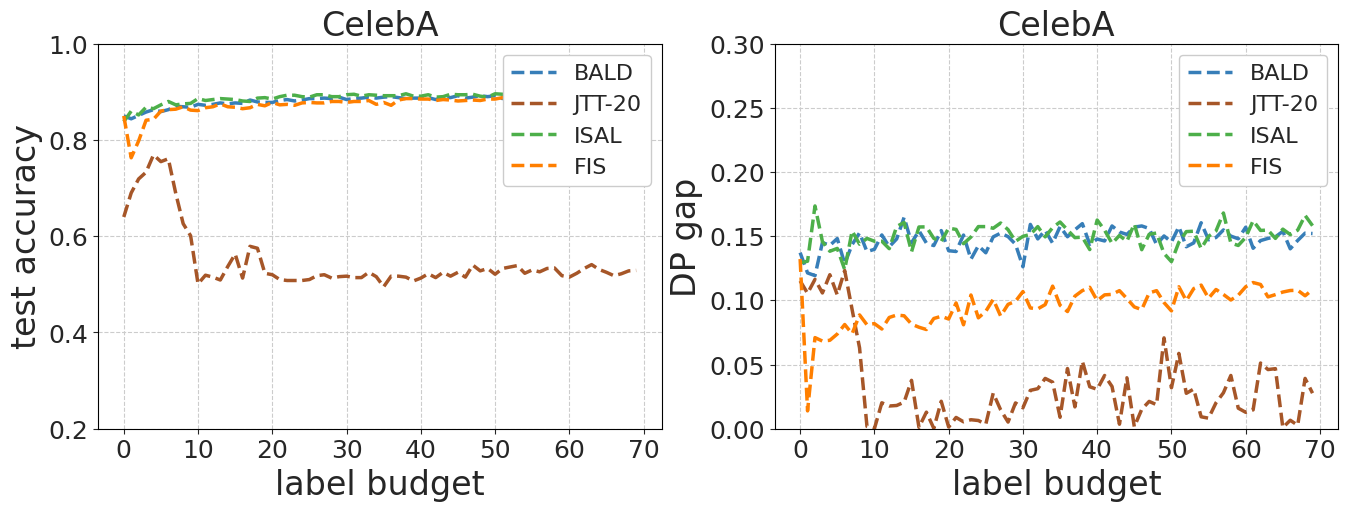

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set the Seaborn theme
sns.set_style('ticks')
palette = plt.get_cmap('Set1')


def moving_average(data, window_size):
    """计算移动平均"""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 5))


'''
Dataset option
'''

# 1: adult
# 2: compas
# 3: jigsaw
# 4: celeba

##############################

dataset_num = 4

##############################

if dataset_num == 1:
    ################ adult dataset ###########################

    dataset = 'adult'
    dataset_tag = 'Adult'

    tol = 0.05
    avg_cnt = 3
    suffix = ''
    root = f'./logs/fair_sampling/{dataset}-sex-runs0/'
    # file_name_strategy5 = 'label_s2_dp_4_budget.log'
    # file_name_baseline_1 = 'label_s6_dp_4_budget.log'
    # file_name_baseline_2 = 'label_s7_dp_4_budget.log'
    # file_name_baseline_3 = 'label_s8_dp_4_budget.log'
    file_name_strategy5 = 'label_s2_dp_4_default.log'
    file_name_baseline_1 = 'label_s6_dp_4_default.log'
    file_name_baseline_2 = 'label_s7_dp_4_default.log'
    file_name_baseline_3 = 'label_s8_dp_4_default.log'
    gap_lower_bound = 0.15
    gap_upper_bound = 0.35
    
    acc_lower_bound = 0.5
    acc_upper_bound = 0.8

    step_gap = 20
    # 设置窗口大小
    # window_size = 20 #default setting
    window_size = 30
    
    ###########################################################
elif dataset_num ==2:

    ################ compas dataset ###########################

    dataset = 'compas'
    dataset_tag = 'Compas'

    tol = 0.05
    avg_cnt = 3
    suffix = ''
    root = f'./logs/fair_sampling/{dataset}-runs2/'
    # file_name_strategy5 = 'label_s5_dp_4_budget.log'
    # file_name_baseline = 'label_s6_dp_4_budget.log'
    file_name_strategy5 = 'label_s2_dp_4_default.log'
    file_name_baseline_1 = 'label_s6_dp_4_default.log'
    file_name_baseline_2 = 'label_s7_dp_4_default.log'
    file_name_baseline_3 = 'label_s8_dp_4_default.log'
    gap_lower_bound = 0.25
    gap_upper_bound = 0.35
    
    acc_lower_bound = 0.65
    acc_upper_bound = 0.75
    step_gap = 20
    window_size = 15
    ###########################################################

elif dataset_num == 3:
    ################ jigsaw dataset ###########################

    dataset = 'jigsaw'
    dataset_tag = 'Jigsaw'

    tol = 0.05
    avg_cnt = 5
    suffix = ''
    root = f'./logs/fair_sampling/{dataset}-runs0/'
    # file_name_strategy5 = 'label_s5_dp_4_512.log'
    # file_name_baseline_1 = 'label_s6_dp_4_512.log'
    # file_name_baseline_2 = 'label_s7_dp_4_512.log'
    # file_name_baseline_3 = 'label_s8_dp_4_512.log'
    file_name_strategy5 = 'label_s2_dp_4_default.log'
    file_name_baseline_1 = 'label_s6_dp_4_default.log'
    file_name_baseline_2 = 'label_s7_dp_4_default.log'
    file_name_baseline_3 = 'label_s8_dp_4_default.log'
    gap_lower_bound = 0
    gap_upper_bound = 0.1

    acc_lower_bound = 0.7
    acc_upper_bound = 0.8
    step_gap = 10
    window_size = 6
    ###########################################################
elif dataset_num == 4:

    ############### celeba dataset ###########################
    dataset = 'celeba'
    dataset_tag = 'CelebA'
    tol = 0.05
    #tol = 0.01
    avg_cnt = 3
    suffix = ''
    # root = f'./logs/fair_sampling/{dataset}-backup/'
    root = f'./logs/fair_sampling/{dataset}-runs0/'
    # file_name_strategy5 = 'Smiling_s5_dp_4_256.log'
    # file_name_baseline = 'Smiling_s6_dp_4_256.log'
    file_name_strategy5 = 'Smiling_s5_dp_4_256.log'
    file_name_baseline_1 = 'Smiling_s6_dp_4_256.log'
    # file_name_baseline_2 = 'Smiling_s7_dp_4_xx.log'
    file_name_baseline_2 = 'Smiling_s7_dp_4_figure.log'
    file_name_baseline_3 = 'Smiling_s8_dp_4_default.log'

    gap_lower_bound = 0
    gap_upper_bound = 0.3
    
    acc_lower_bound = 0.2
    acc_upper_bound = 1
    step_gap = 10
    window_size = 1



############################################
baseline_1 = 'BALD'
baseline_2 = 'JTT-20'
baseline_3 = 'ISAL'
proposed_method = 'FIS' 


##########################################################
# Read your log file
with open(root + file_name_strategy5, 'r') as file:
    log_data_strategy5 = file.read()

# Additional log data (for comparison)
# Read your log file
with open(root + file_name_baseline_1, 'r') as file:
    log_data_baseline_1 = file.read()

with open(root + file_name_baseline_2, 'r') as file:
    log_data_baseline_2 = file.read()

with open(root + file_name_baseline_3, 'r') as file:
    log_data_baseline_3 = file.read()

# Regular expression pattern to find test accuracy and DP gap
pattern = r'test acc: ([0-9.]+) .+ test dp gap: ([0-9.]+)'

# Extracting data
test_acc = []
dp_gap = []

for match in re.finditer(pattern, log_data_strategy5):
    test_acc.append(float(match.group(1)))
    dp_gap.append(float(match.group(2)))


# Note: This will work if the length of dp_gap is divisible by 4.
# If it's not, you might need to handle the last few values separately.


### Baseline: BALD
additional_test_acc_1 = []
additional_dp_gap_1 = []

additional_test_acc_2 = []
additional_dp_gap_2 = []

additional_test_acc_3 = []
additional_dp_gap_3 = []

for match in re.finditer(pattern, log_data_baseline_1):
    additional_test_acc_1.append(float(match.group(1)))
    additional_dp_gap_1.append(float(match.group(2)))

for match in re.finditer(pattern, log_data_baseline_2):
    additional_test_acc_2.append(float(match.group(1)))
    additional_dp_gap_2.append(float(match.group(2)))

for match in re.finditer(pattern, log_data_baseline_3):
    additional_test_acc_3.append(float(match.group(1)))
    additional_dp_gap_3.append(float(match.group(2)))

# # Plotting Test Accuracy
# fig, axs[0] = plt.subplots()



rounds_list = list(range(len(test_acc)))

############################################################################################
'''test accuracy'''

# 对 dp_gap 和 additional_dp_gap 应用移动平均
smoothed_test_acc = moving_average(test_acc, window_size)
smoothed_additional_test_acc_1 = moving_average(additional_test_acc_1, window_size)
smoothed_additional_test_acc_2 = moving_average(additional_test_acc_2, window_size)
smoothed_additional_test_acc_3 = moving_average(additional_test_acc_3, window_size)

# 更新 rounds_list 以匹配平滑数据的长度
smoothed_rounds_list = list(range(len(smoothed_test_acc)))

axs[0].plot(smoothed_rounds_list, smoothed_additional_test_acc_1, color=palette(1), label=baseline_1, linewidth=2.5, linestyle='--')
axs[0].plot(smoothed_rounds_list, smoothed_additional_test_acc_2, color=palette(6), label=baseline_2, linewidth=2.5, linestyle='--')
axs[0].plot(smoothed_rounds_list, smoothed_additional_test_acc_3, color=palette(2), label=baseline_3, linewidth=2.5, linestyle='--')

axs[0].plot(smoothed_rounds_list, smoothed_test_acc, color=palette(4), label=proposed_method, linewidth=2.5, linestyle='--')

axs[0].set_title(dataset_tag, fontsize=24)
axs[0].set_xlabel('label budget', fontsize=24)
axs[0].set_ylabel('test accuracy', fontsize=24)
axs[0].set_xticks(np.arange(0, len(smoothed_test_acc) +10,step_gap ))  # Set x-axis ticks
axs[0].legend(loc='upper right', frameon=True, framealpha=1, fontsize = 16)
axs[0].set_ylim(acc_lower_bound, acc_upper_bound)  # Set x-axis ticks
axs[0].grid(True, linestyle='--')
# axs[0].grid(True, linestyle='--', color='black')


# For Test Accuracy subplot
axs[0].tick_params(axis='both', labelsize=18)
axs[0].spines['bottom'].set_color('black')
axs[0].spines['left'].set_color('black')
axs[0].spines['top'].set_color('black')
axs[0].spines['right'].set_color('black')

############################################################################################
'''fairness disparity'''

# 对 dp_gap 和 additional_dp_gap 应用移动平均
smoothed_dp_gap = moving_average(dp_gap, window_size)
smoothed_additional_dp_gap_1 = moving_average(additional_dp_gap_1, window_size)
smoothed_additional_dp_gap_2 = moving_average(additional_dp_gap_2, window_size)
smoothed_additional_dp_gap_3 = moving_average(additional_dp_gap_3, window_size)

# 更新 rounds_list 以匹配平滑数据的长度
smoothed_rounds_list = list(range(len(smoothed_dp_gap)))







axs[1].plot(smoothed_rounds_list, smoothed_additional_dp_gap_1, color=palette(1), label=baseline_1, linewidth=2.5, linestyle='--')
axs[1].plot(smoothed_rounds_list, smoothed_additional_dp_gap_2, color=palette(6), label=baseline_2, linewidth=2.5, linestyle='--')

axs[1].plot(smoothed_rounds_list, smoothed_additional_dp_gap_3, color=palette(2), label=baseline_3, linewidth=2.5, linestyle='--')

axs[1].plot(smoothed_rounds_list, smoothed_dp_gap, color=palette(4), label=proposed_method, linewidth=2.5, linestyle='--')

axs[1].tick_params(axis='both', labelsize=18)
axs[1].spines['bottom'].set_color('black')
axs[1].spines['left'].set_color('black')
axs[1].spines['top'].set_color('black')
axs[1].spines['right'].set_color('black')

axs[1].set_ylim(gap_lower_bound, gap_upper_bound)  # Set x-axis ticks
axs[1].set_title(dataset_tag, fontsize=24)
axs[1].set_xlabel('label budget', fontsize=24)
axs[1].set_ylabel('DP gap', fontsize=24)
axs[1].set_xticks(np.arange(0, len(smoothed_dp_gap) +10, step_gap))  # Set x-axis ticks
axs[1].legend(loc='upper right', frameon=True, framealpha=1, fontsize = 16)
axs[1].grid(True, linestyle='--')



plt.subplots_adjust(wspace=0.2)  # Adjust this value to increase space between plots

plt.show()

fig_path = 'figures/'
big_fig_name = dataset + '_impact_label_budget-mini.pdf'
fig.savefig(fig_path + big_fig_name, dpi=300, bbox_inches='tight')


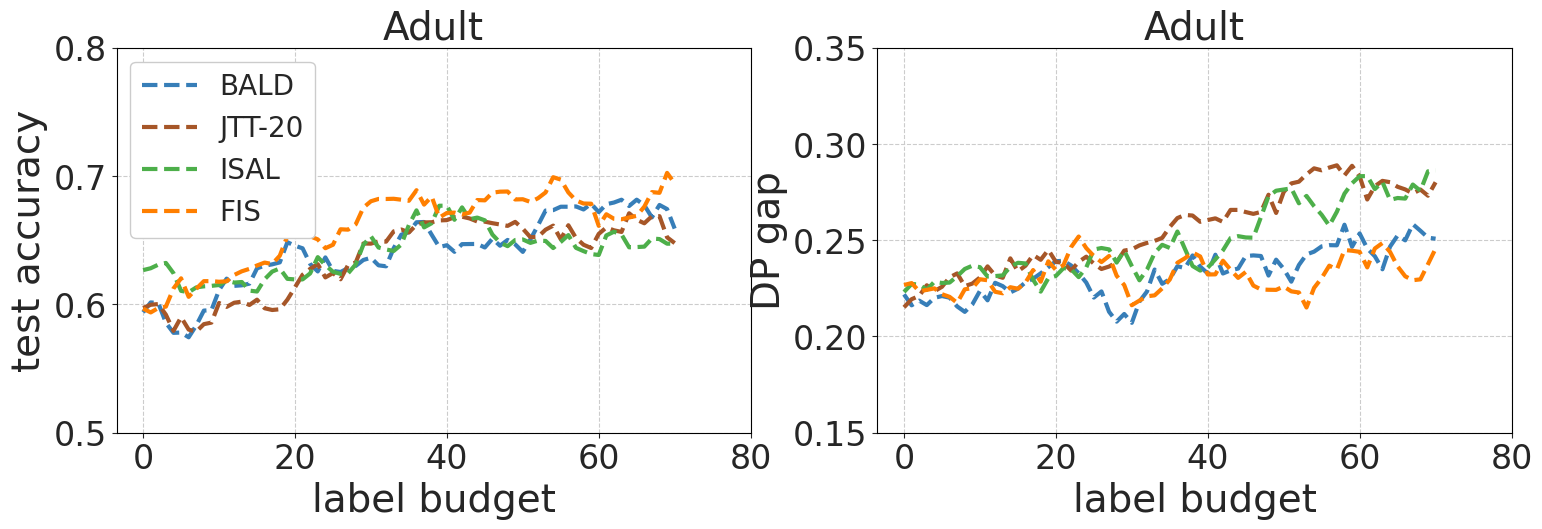

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set the Seaborn theme
sns.set_style('ticks')
palette = plt.get_cmap('Set1')


def moving_average(data, window_size):
    """计算移动平均"""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 5))


'''
Dataset option
'''

# 1: adult
# 2: compas
# 3: jigsaw
# 4: celeba

##############################

dataset_num = 2

##############################

if dataset_num == 1:
    ################ adult dataset ###########################

    dataset = 'adult'
    dataset_tag = 'Adult'

    tol = 0.05
    avg_cnt = 3
    suffix = ''
    root = f'./logs/fair_sampling/{dataset}-sex-runs0/'
    # file_name_strategy5 = 'label_s2_dp_4_budget.log'
    # file_name_baseline_1 = 'label_s6_dp_4_budget.log'
    # file_name_baseline_2 = 'label_s7_dp_4_budget.log'
    # file_name_baseline_3 = 'label_s8_dp_4_budget.log'
    file_name_strategy5 = 'label_s2_dp_4_default.log'
    file_name_baseline_1 = 'label_s6_dp_4_default.log'
    file_name_baseline_2 = 'label_s7_dp_4_default.log'
    file_name_baseline_3 = 'label_s8_dp_4_default.log'
    gap_lower_bound = 0.15
    gap_upper_bound = 0.35
    
    acc_lower_bound = 0.5
    acc_upper_bound = 0.8

    step_gap = 20
    # 设置窗口大小
    # window_size = 20 #default setting
    window_size = 30
    
    ###########################################################
elif dataset_num ==2:

    ################ compas dataset ###########################

    dataset = 'compas'
    dataset_tag = 'Compas'

    tol = 0.05
    avg_cnt = 3
    suffix = ''
    root = f'./logs/fair_sampling/{dataset}-runs2/'
    # file_name_strategy5 = 'label_s5_dp_4_budget.log'
    # file_name_baseline = 'label_s6_dp_4_budget.log'
    file_name_strategy5 = 'label_s2_dp_4_default.log'
    file_name_baseline_1 = 'label_s6_dp_4_default.log'
    file_name_baseline_2 = 'label_s7_dp_4_default.log'
    file_name_baseline_3 = 'label_s8_dp_4_default.log'
    gap_lower_bound = 0.25
    gap_upper_bound = 0.35
    
    acc_lower_bound = 0.65
    acc_upper_bound = 0.75
    step_gap = 20
    window_size = 15
    ###########################################################

elif dataset_num == 3:
    ################ jigsaw dataset ###########################

    dataset = 'jigsaw'
    dataset_tag = 'Jigsaw'

    tol = 0.05
    avg_cnt = 5
    suffix = ''
    root = f'./logs/fair_sampling/{dataset}-runs0/'
    # file_name_strategy5 = 'label_s5_dp_4_512.log'
    # file_name_baseline_1 = 'label_s6_dp_4_512.log'
    # file_name_baseline_2 = 'label_s7_dp_4_512.log'
    # file_name_baseline_3 = 'label_s8_dp_4_512.log'
    file_name_strategy5 = 'label_s2_dp_4_default.log'
    file_name_baseline_1 = 'label_s6_dp_4_default.log'
    file_name_baseline_2 = 'label_s7_dp_4_default.log'
    file_name_baseline_3 = 'label_s8_dp_4_default.log'
    gap_lower_bound = 0
    gap_upper_bound = 0.1

    acc_lower_bound = 0.7
    acc_upper_bound = 0.8
    step_gap = 10
    window_size = 6
    ###########################################################
elif dataset_num == 4:

    ############### celeba dataset ###########################
    dataset = 'celeba'
    dataset_tag = 'CelebA'
    tol = 0.05
    #tol = 0.01
    avg_cnt = 3
    suffix = ''
    # root = f'./logs/fair_sampling/{dataset}-backup/'
    root = f'./logs/fair_sampling/{dataset}-runs0/'
    # file_name_strategy5 = 'Smiling_s5_dp_4_256.log'
    # file_name_baseline = 'Smiling_s6_dp_4_256.log'
    file_name_strategy5 = 'Smiling_s5_dp_4_256.log'
    file_name_baseline_1 = 'Smiling_s6_dp_4_256.log'
    # file_name_baseline_2 = 'Smiling_s7_dp_4_xx.log'
    file_name_baseline_2 = 'Smiling_s7_dp_4_figure.log'
    file_name_baseline_3 = 'Smiling_s8_dp_4_default.log'

    gap_lower_bound = 0
    gap_upper_bound = 0.3
    
    acc_lower_bound = 0
    acc_upper_bound = 1
    step_gap = 10
    window_size = 1



############################################
baseline_1 = 'BALD'
baseline_2 = 'JTT-20'
baseline_3 = 'ISAL'
proposed_method = 'FIS' 


##########################################################
# Read your log file
with open(root + file_name_strategy5, 'r') as file:
    log_data_strategy5 = file.read()

# Additional log data (for comparison)
# Read your log file
with open(root + file_name_baseline_1, 'r') as file:
    log_data_baseline_1 = file.read()

with open(root + file_name_baseline_2, 'r') as file:
    log_data_baseline_2 = file.read()

with open(root + file_name_baseline_3, 'r') as file:
    log_data_baseline_3 = file.read()

# Regular expression pattern to find test accuracy and DP gap
pattern = r'test acc: ([0-9.]+) .+ test dp gap: ([0-9.]+)'

# Extracting data
test_acc = []
dp_gap = []

for match in re.finditer(pattern, log_data_strategy5):
    test_acc.append(float(match.group(1)))
    dp_gap.append(float(match.group(2)))


# Note: This will work if the length of dp_gap is divisible by 4.
# If it's not, you might need to handle the last few values separately.


### Baseline: BALD
additional_test_acc_1 = []
additional_dp_gap_1 = []

additional_test_acc_2 = []
additional_dp_gap_2 = []

additional_test_acc_3 = []
additional_dp_gap_3 = []

for match in re.finditer(pattern, log_data_baseline_1):
    additional_test_acc_1.append(float(match.group(1)))
    additional_dp_gap_1.append(float(match.group(2)))

for match in re.finditer(pattern, log_data_baseline_2):
    additional_test_acc_2.append(float(match.group(1)))
    additional_dp_gap_2.append(float(match.group(2)))

for match in re.finditer(pattern, log_data_baseline_3):
    additional_test_acc_3.append(float(match.group(1)))
    additional_dp_gap_3.append(float(match.group(2)))

# # Plotting Test Accuracy
# fig, axs[0] = plt.subplots()



rounds_list = list(range(len(test_acc)))

############################################################################################
'''test accuracy'''

# 对 dp_gap 和 additional_dp_gap 应用移动平均
smoothed_test_acc = moving_average(test_acc, window_size)
smoothed_additional_test_acc_1 = moving_average(additional_test_acc_1, window_size)
smoothed_additional_test_acc_2 = moving_average(additional_test_acc_2, window_size)
smoothed_additional_test_acc_3 = moving_average(additional_test_acc_3, window_size)

# 更新 rounds_list 以匹配平滑数据的长度
smoothed_rounds_list = list(range(len(smoothed_test_acc)))

axs[0].plot(smoothed_rounds_list, smoothed_additional_test_acc_1, color=palette(1), label=baseline_1, linewidth=3, linestyle='--')
axs[0].plot(smoothed_rounds_list, smoothed_additional_test_acc_2, color=palette(6), label=baseline_2, linewidth=3, linestyle='--')
axs[0].plot(smoothed_rounds_list, smoothed_additional_test_acc_3, color=palette(2), label=baseline_3, linewidth=3, linestyle='--')

axs[0].plot(smoothed_rounds_list, smoothed_test_acc, color=palette(4), label=proposed_method, linewidth=3, linestyle='--')

axs[0].set_title(dataset_tag, fontsize=28)
axs[0].set_xlabel('label budget', fontsize=28)
axs[0].set_ylabel('test accuracy', fontsize=28)
axs[0].set_xticks(np.arange(0, len(smoothed_test_acc) +10,step_gap ))  # Set x-axis ticks
axs[0].legend(loc='upper left', frameon=True, framealpha=1, fontsize = 20)
axs[0].set_ylim(acc_lower_bound, acc_upper_bound)  # Set x-axis ticks
axs[0].grid(True, linestyle='--')
# axs[0].grid(True, linestyle='--', color='black')


# For Test Accuracy subplot
axs[0].tick_params(axis='both', labelsize=24)
axs[0].spines['bottom'].set_color('black')
axs[0].spines['left'].set_color('black')
axs[0].spines['top'].set_color('black')
axs[0].spines['right'].set_color('black')

############################################################################################
'''fairness disparity'''

# 对 dp_gap 和 additional_dp_gap 应用移动平均
smoothed_dp_gap = moving_average(dp_gap, window_size)
smoothed_additional_dp_gap_1 = moving_average(additional_dp_gap_1, window_size)
smoothed_additional_dp_gap_2 = moving_average(additional_dp_gap_2, window_size)
smoothed_additional_dp_gap_3 = moving_average(additional_dp_gap_3, window_size)

# 更新 rounds_list 以匹配平滑数据的长度
smoothed_rounds_list = list(range(len(smoothed_dp_gap)))







axs[1].plot(smoothed_rounds_list, smoothed_additional_dp_gap_1, color=palette(1), label=baseline_1, linewidth=3, linestyle='--')
axs[1].plot(smoothed_rounds_list, smoothed_additional_dp_gap_2, color=palette(6), label=baseline_2, linewidth=3, linestyle='--')

axs[1].plot(smoothed_rounds_list, smoothed_additional_dp_gap_3, color=palette(2), label=baseline_3, linewidth=3, linestyle='--')

axs[1].plot(smoothed_rounds_list, smoothed_dp_gap, color=palette(4), label=proposed_method, linewidth=3, linestyle='--')

axs[1].tick_params(axis='both', labelsize=24)
axs[1].spines['bottom'].set_color('black')
axs[1].spines['left'].set_color('black')
axs[1].spines['top'].set_color('black')
axs[1].spines['right'].set_color('black')

axs[1].set_ylim(gap_lower_bound, gap_upper_bound)  # Set x-axis ticks
axs[1].set_title(dataset_tag, fontsize=28)
axs[1].set_xlabel('label budget', fontsize=28)
axs[1].set_ylabel('DP gap', fontsize=28)
axs[1].set_xticks(np.arange(0, len(smoothed_dp_gap) +10, step_gap))  # Set x-axis ticks
# axs[1].legend(loc='upper left', frameon=True, framealpha=1, fontsize = 20)
axs[1].grid(True, linestyle='--')



plt.subplots_adjust(wspace=0.2)  # Adjust this value to increase space between plots

plt.show()

fig_path = 'figures/'
big_fig_name = dataset + '_impact_label_budget-mini.pdf'
fig.savefig(fig_path + big_fig_name, dpi=300, bbox_inches='tight')